# Bike Sharing Data Analysis and Modeling
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

#### Business Goal:

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



### Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('max.columns',500)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## 1. Data Understanding

### Read and Inspect Data

In [2]:
#Read the csv file using pandas
df = pd.read_csv('day.csv')

#Inspect first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Print datafrane info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Describe the data frame to look at the stats
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Print the shape
df.shape

(730, 16)

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns. 

## 2. Cleaning Data

### 2.1 Drop Unnecessary Columns

#### Instant column is an index and can be dropped. 
#### dteday column represents date, however we have yr and mnth columns representing the year and month which is sufficient to represent the date, hence dteday can be dropped. Before dropping it, we will create a variable for days old which indicates how old is the business
#### casual and registered columns represent the same information present in cnt variable which is a sum of casual and registered variables, hence they can be dropped and take cnt as the target variable.

In [6]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
df['days_old'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [7]:
#Inspect once
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [8]:
#Drop instant, dteday, casual and registered columns
df.drop(columns=['instant','dteday','casual','registered'],inplace=True)

#Inspect data frame after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### 2.2 Handle Missing values

#### As we have already seen there are no missing values. However, let us verify it again

In [9]:
#Print null counts by column
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### As there are no missing values, data is looking good with respect to this.

### 2.3 Handle Outliers

In [10]:
### Handle Outliers
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [11]:
#Print number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

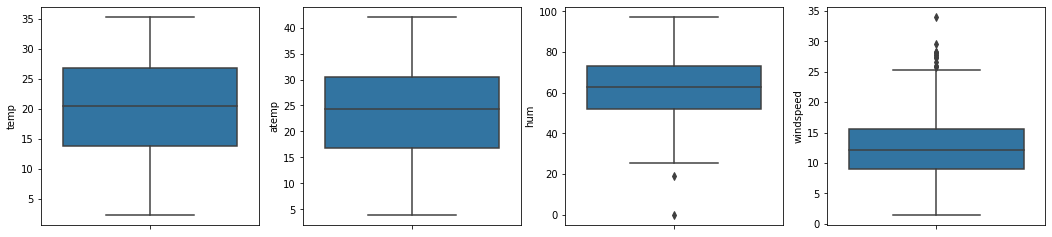

In [12]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## 3. EDA

#### Draw pair Plots to check the linear relationship

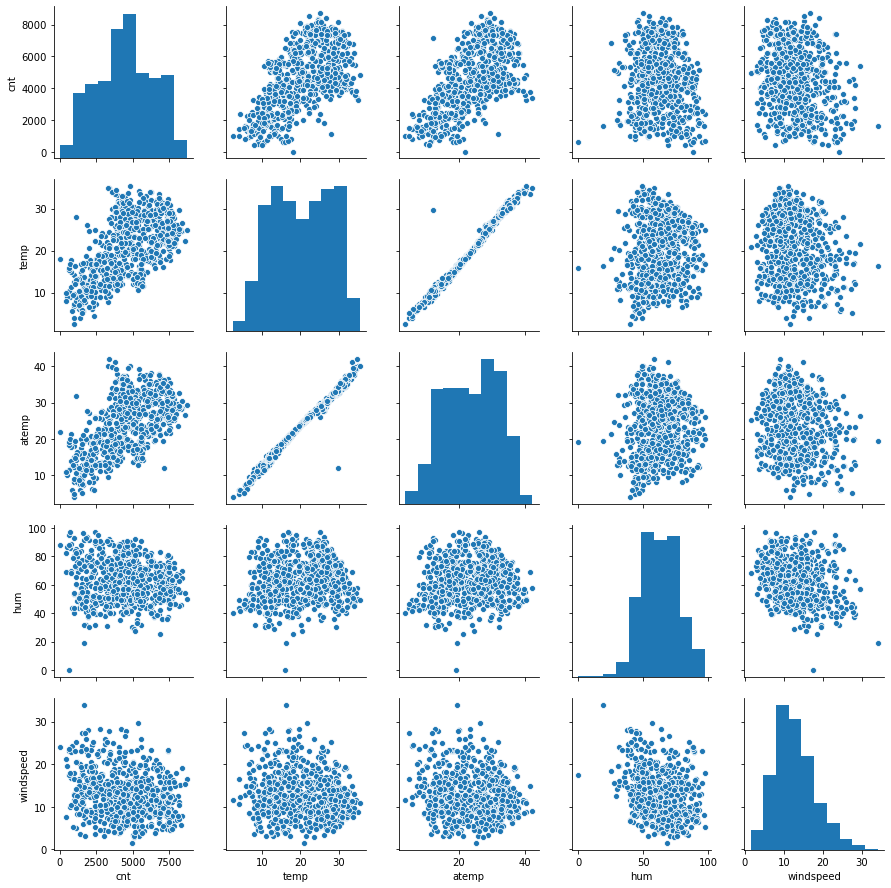

In [13]:
#Draw pairplots for continuous numeric variables using seaborn
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 


#### Draw Heatmap of correlation between variables

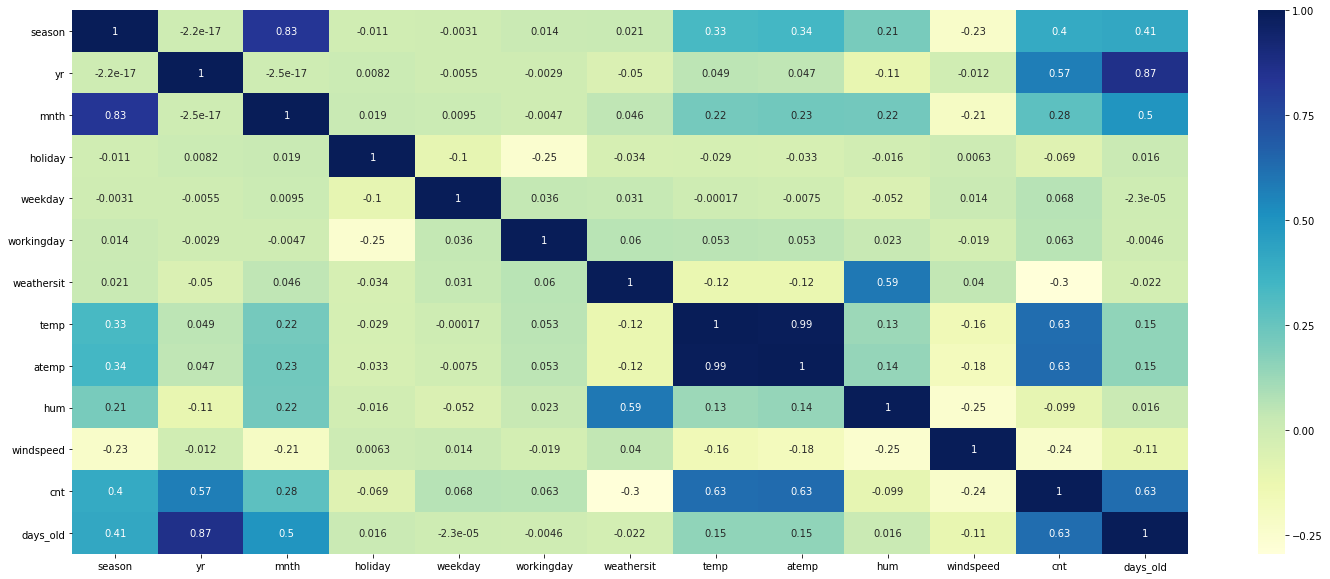

In [14]:
#Calculate Correlation
corr = df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )

#### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

#### Weather vs Target variable

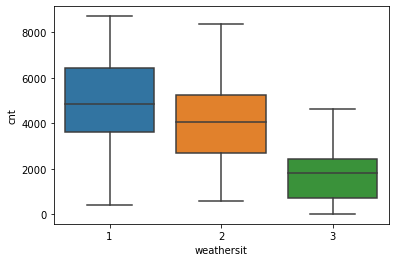

In [15]:
sns.boxplot(x='weathersit',y='cnt',data=df)

#### When the weather is clear(1), Bike sharing is more when it is rainy(3), it is less. Our model should predicts it in the same manner.



#### Month vs Target Variable

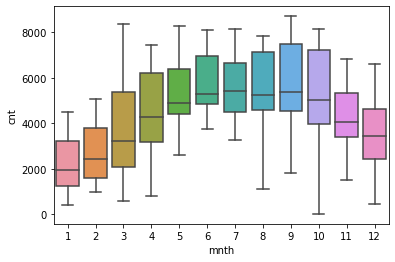

In [16]:
sns.boxplot(x='mnth',y='cnt',data=df)

#### During September(9), bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.


#### Season vs Mean Temperature

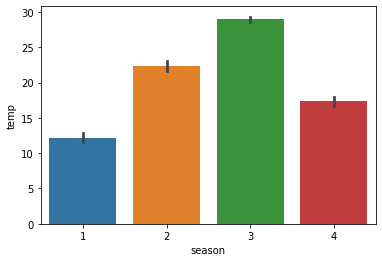

In [17]:
sns.barplot(x='season',y='temp',data=df)

#### As expected temperature is more during summer(2) season. Surprisingly, temperature during fall (3) season is higher.

## 4. Data Preparation

### 4.1 Prepare Categorical Variables

In [18]:
# Check number of unique values in all columns to identify categorical variables
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64


#### Create dummy variables for all categorical variables

In [19]:
#Categorical variables
cols = ['season','mnth','weekday','weathersit']

#Create Dummies
df = pd.get_dummies(data = df,columns=cols,
                            prefix=['season','mnth','weekday','weather'],
                            drop_first=True)

In [20]:
#Print columns after creating dummies
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weather_2', 'weather_3'],
      dtype='object')

In [21]:
#Let us give the columns intuitive names
df.columns = ['Year', 'Holiday', 'Workingday', 'Temperature', 'FeelTemp', 'Humidity', 'WindSpeed',
       'Count', 'days_old', 'Summer', 'Fall', 'Winter', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'october',
       'November', 'December', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'Cloudy', 'Rainy']

In [22]:
#Print few rows to inspect
df.head()

,Year,Holiday,Workingday,Temperature,FeelTemp,Humidity,WindSpeed,Count,days_old,Summer,Fall,Winter,February,March,April,May,June,July,August,September,october,November,December,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Cloudy,Rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 5. Model Building

### 5.2 Split Data into training and test

In [23]:
#y to contain only target variable
y=df.pop('Count')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
#Inspect independent variables
X.head()

,Year,Holiday,Workingday,Temperature,FeelTemp,Humidity,WindSpeed,days_old,Summer,Fall,Winter,February,March,April,May,June,July,August,September,october,November,December,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Cloudy,Rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 5.3 Feature Scaling

In [25]:
# Let us scale continuous variables
num_vars = ['Temperature','FeelTemp','Humidity','WindSpeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [26]:
#Inspect stats fro Training set after scaling
X_train.describe()

,Year,Holiday,Workingday,Temperature,FeelTemp,Humidity,WindSpeed,days_old,Summer,Fall,Winter,February,March,April,May,June,July,August,September,october,November,December,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Cloudy,Rainy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.258317,0.260274,0.250489,0.074364,0.062622,0.086106,0.091977,0.084149,0.091977,0.074364,0.09002,0.09002,0.091977,0.074364,0.148728,0.131115,0.140900,0.146771,0.129159,0.150685,0.346380,0.029354
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.438138,0.439214,0.433719,0.262619,0.242520,0.280795,0.289276,0.277883,0.289276,0.262619,0.28649,0.28649,0.289276,0.262619,0.356169,0.337857,0.348259,0.354224,0.335704,0.358092,0.476282,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.4 Build a Model using RFE + Manual (Mixed Approach)

#### Use RFE to eliminate some columns

In [27]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [28]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', False, 3),
 ('Temperature', True, 1),
 ('FeelTemp', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('days_old', True, 1),
 ('Summer', True, 1),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('February', False, 11),
 ('March', True, 1),
 ('April', False, 10),
 ('May', False, 5),
 ('June', False, 8),
 ('July', False, 4),
 ('August', False, 7),
 ('September', True, 1),
 ('october', True, 1),
 ('November', False, 9),
 ('December', False, 6),
 ('weekday_1', False, 13),
 ('weekday_2', False, 12),
 ('weekday_3', False, 16),
 ('weekday_4', False, 15),
 ('weekday_5', False, 14),
 ('weekday_6', False, 2),
 ('Cloudy', True, 1),
 ('Rainy', True, 1)]

### Manual elimination

##### Function to build a model using statsmodel api

In [29]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [30]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [31]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['Year', 'Holiday', 'Temperature', 'FeelTemp', 'Humidity', 'WindSpeed',
       'days_old', 'Summer', 'Fall', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy'],
      dtype='object')

### Build Model 

### Model 1 - Start with all variables selected by RFE

In [32]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['Year', 'Holiday', 'Temperature', 'FeelTemp', 'Humidity', 'WindSpeed',
       'days_old', 'Summer', 'Fall', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.15e-186
Time:                        16:06:01   Log-Likelihood:                -4124.6
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     495   BIC:                             8349.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1931.8878    261.116      7.399      

#### DropFeelTemp from the model as it has a very high VIF and P-value.  It's variation is explained by Temperature variable. It is also insignificant due to high P-Value. But that may change after dropping FeelTemp

### Model 2

In [33]:
#Selected columns for Model 2 - Drop FeelTemp

cols = ['Year', 'Holiday', 'Temperature', 'Humidity', 'WindSpeed',
       'days_old', 'Summer', 'Fall', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.20e-187
Time:                        16:06:01   Log-Likelihood:                -4124.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8343.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1953.1207    259.739      7.520      

#### Days Old is multicollinear and is also insignificant due to p value more than 0.05. Let us drop it. 

### Model 3

In [34]:
#Selected columns for Model 3 - Drop days_old 
cols = ['Year', 'Holiday', 'Temperature', 'Humidity', 'WindSpeed',
        'Summer', 'Fall', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.39e-187
Time:                        16:06:01   Log-Likelihood:                -4126.4
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1897.9068    258.191      7.351      

#### Temparature is multicollinear but has a large coefficient which is contradicting. Let us try dropping Temparature and check the model.

### Model 4

In [35]:
#Selected columns for Model 4 - Drop Temperature 
cols = ['Year', 'Holiday', 'Humidity', 'WindSpeed',
        'Summer', 'Fall', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.25e-157
Time:                        16:06:01   Log-Likelihood:                -4200.3
No. Observations:                 511   AIC:                             8427.
Df Residuals:                     498   BIC:                             8482.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2715.8698    288.981      9.398      0.0

#### By dropping Temperature, R2 value and F-stat dropped significantly. Also, using the intuition from the correlation map, Temperature has a high correlation with output variable. Bring back Temperature (i.e Model #3). By looking at Model 3, next variable with high VIF is Humidity.  Hence let us first drop Humiduty which has next high VIF

### Model 5

In [36]:
#Selected columns for Model 5 - Bring Back Temperature and Drop season_3
cols = ['Year', 'Holiday', 'Temperature', 'WindSpeed',
        'Summer', 'Fall', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.84e-185
Time:                        16:06:01   Log-Likelihood:                -4135.3
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     498   BIC:                             8352.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1044.3618    161.433      6.469      

#### We are back to a good R2 and F-stat values. However,  Still Temperature has a high VIF, bus as we have already seen, it seems to impact R2 significantly and it has a very high coefficient. Hencm drop Fall season with next highest VIF. 

### Model 6

In [37]:
#Selected columns for Model 6 - Drop Fall season 
cols = ['Year', 'Holiday', 'Temperature', 'WindSpeed',
        'Summer', 'Winter', 'March', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.76e-180
Time:                        16:06:01   Log-Likelihood:                -4148.7
No. Observations:                 511   AIC:                             8321.
Df Residuals:                     499   BIC:                             8372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         864.4506    161.706      5.346      

#### Again, though Temperature has high VIF, it has the largest coefficient. Drop March with lowest coefficient and little insignificant due to p-value of  0.03.

### Model 7

In [38]:
#Selected columns for Model 7 - Drop March
cols = ['Year', 'Holiday', 'Temperature', 'WindSpeed',
        'Summer', 'Winter', 'September', 'october',
       'Cloudy', 'Rainy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.82e-180
Time:                        16:06:01   Log-Likelihood:                -4151.1
No. Observations:                 511   AIC:                             8324.
Df Residuals:                     500   BIC:                             8371.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         932.8940    159.181      5.861      

#### Now, Temperature variable's VIF is beow 5, so we can keep it. Also, retained R-squared value above 0.8 and gap between R2 and Adjusted R2 slightly reduced, F-stat gradually increased. All P values are looking good. So, we should be good with this model. We consider this as our final model  

#### Temperature's coefficient is high compared to other variables, which means it has high impact on the output variable. 

## 5.5 Final Model

#### Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

#### We have used statsmodels api for feature selection as it presents the statistics neatly. Let us now build the final model using sklearn. It would have same results (Coefficients, R2 etc)

In [39]:
#Build a model with all columns to select features automarically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [40]:
#Let us build the finalmodel using sklearn
cols = ['Year', 'Holiday', 'Temperature', 'WindSpeed',
        'Summer', 'Winter', 'September', 'october',
       'Cloudy', 'Rainy']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

932.8940115498117 [ 1983.16552727  -774.66516283  4796.12399227  -816.22779326
   826.22915057  1066.71614701   907.56553764   519.18807362
  -690.45015041 -2193.54230969]


## 5.6 Model Evaluation 
### 5.6.1 Residucal Analysis

In [41]:
y_train_pred = lr.predict(X_train[cols])

In [42]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

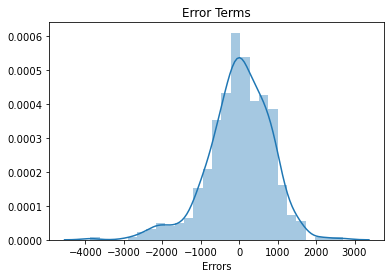

In [43]:
plot_res_dist(y_train, y_train_pred)

#### Error terms are normally distributed (One of the assumptions of linear regression)

In [44]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.822386803406019

#### R2 Same as we obtained for our final model 

#### Predict values for test data set

In [45]:
#Scale variables in X_test
num_vars = ['Temperature','FeelTemp','Humidity','WindSpeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [46]:
#Columns from our final model
cols = ['Year', 'Holiday', 'Temperature', 'WindSpeed',
        'Summer', 'Winter', 'September', 'october',
       'Cloudy', 'Rainy']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 5.6.2 R-Squared value for test predictions

In [47]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8182433557398475

### 5.6.3 Homoscedacity

#### R2 value for predictions on test data (0.818) is almost same as R2 value of train data(0.822). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

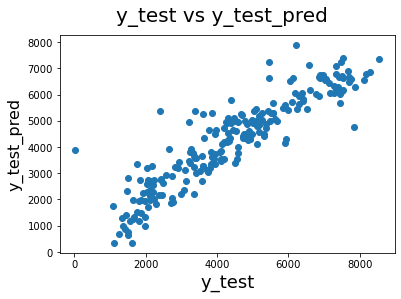

In [48]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### 5.6.4 Plot Test vs Predicted test values

In [49]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

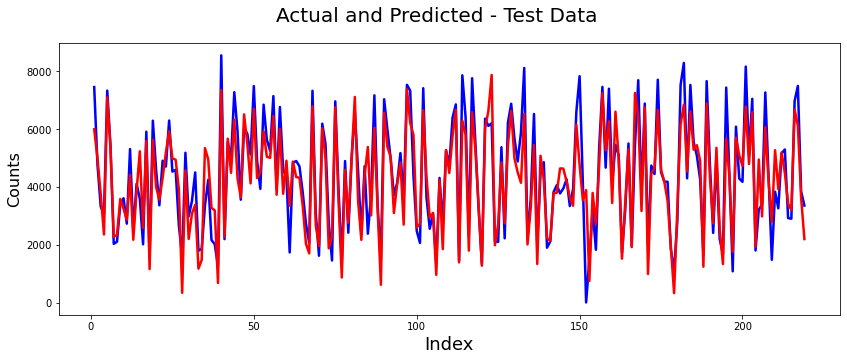

In [50]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### As we can see predictions for test data is very close to actuals

### 5.6.5 Plot Error Terms for test data

In [51]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

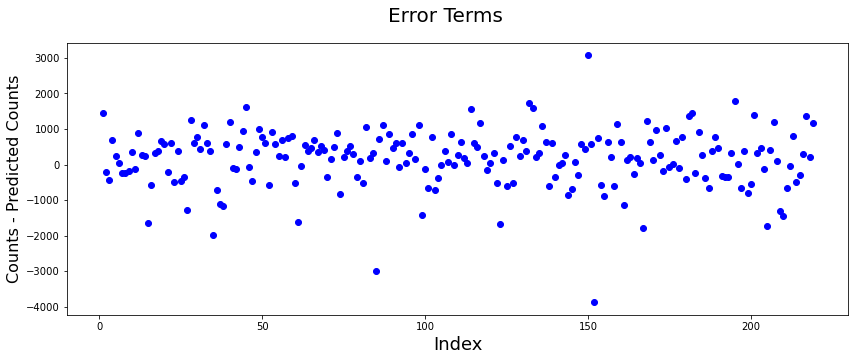

In [52]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.






#### Let us also compare our model with automatic selection of 10 variables using Recursive Feature Elimination

## 5.7 Intrepretting the Model

#### Let us go with interpretting the RFE + Manual model results as we give more importance to imputation

In [53]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['Year', 'Holiday', 'Temperature', 'WindSpeed',
        'Summer', 'Winter', 'September', 'october',
       'Cloudy', 'Rainy']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.82e-180
Time:                        16:06:02   Log-Likelihood:                -4151.1
No. Observations:                 511   AIC:                             8324.
Df Residuals:                     500   BIC:                             8371.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         932.8940    159.181      5.861      

### Interepretation of results

#### From the model results:
1. Temperature is the most signficant variable with largest coefficient. Higher the temperature, bike sharing is high.
2. Year Over Year (from 2018 to 2019, variable changes from 0 to 1), there is a large improvement in Bike Sharing. This is because users are getting used to this model and renting the bikes more. Hence, we can see business is growing over time,
3. During Winter and Summer, Bike Sharing is high compared to Spring and fall.
4. When it rains or Cloudy or when windspeed is more, bike sharing is dropped drastrically.
5. During Septmber and October months, Bike sharing is morecompared to other months are balanced.
6. During Holidays, Bike Sharing is dropped

#### To Summarize, Business is growing Year over year and Weather plays major role in bike rentals. Season and Weather seems to be good predictors of how bike sharing is happening. Also, during holidays bike sharing is less. 

#### Driving factors are dry and clear weather with moderate temperature, Holidays and Awareness(Year Over Year growth) 